## Applying Gradient Descent on 1d feature set

### Data:
**Math Scores and Drug Concentrations** from http://www.stat.ufl.edu/~winner/datasets.html

[link to data](http://www.stat.ufl.edu/~winner/data/lsd.dat)


### Goal
Fit a linear regression to predict future math scores based on drug concentration using Gradient Descent Algorithm

In [218]:
# Library imports and dependencies
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from matplotlib import animation, rc
from IPython.display import HTML


#rc('animation', html='html5')

#### Gradient descent algorithm

   Drug  MathScore
0  1.17      78.93
1  2.97      58.20
2  3.26      67.47
3  4.69      37.47
4  5.83      45.65
5  6.00      32.92
6  6.41      29.97


<IPython.core.display.Javascript object>


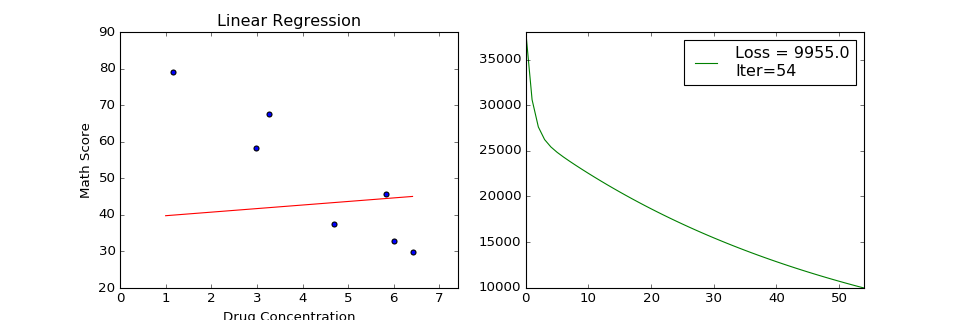

KeyboardInterrupt: 

In [234]:
df = pd.read_csv('lsd.dat.txt', '\s+', header=None, names=['Drug', 'MathScore'])

print(df)



x = df['Drug']
y = df['MathScore']

_y = y/(y.max() - y.min())
_x = x/(x.max() - x.min())


fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1,2,1)


ax1.set_xlim(0, x.max() + 1)

ax1.scatter(x, y, label='')
ax1.set_xlabel('Drug Concentration')
ax1.set_ylabel('Math Score')
ax1.set_title('Linear Regression')


ax_loss = fig.add_subplot(1,2,2)
ax_loss.set_xlabel('Iterations')
ax_loss.set_ylabel('Loss')



## Helper Functions
def hypothesis(w, b, x):
    return w*x + b
    
def get_loss(w, b):
    mean_squares = []
    for (xi,yi) in zip(x,y):
        mean_squares.append((hypothesis(w, b, xi) - yi)**2)
    loss = sum(mean_squares) / 2*len(mean_squares)
    return loss

def draw_line(weight, bias):
    xx = np.linspace(1, x.max())
    ax1.plot(xx , xx*weight+bias, color='red', label='Loss = {}'.format(np.floor(loss(weight, bias))))
    ax1.legend()   

def init_hyp_line():
    line.set_data([], [])

def setup_hypothesis():  
    line, = ax1.plot([],[], color='red')
    #print(line)
    return line

fps = 60

def draw_hyp(weight, bias, line, loss):
    weight, bias
    xx = np.linspace(1, x.max())
    yy = xx*weight+bias
    line.set_data(xx,yy)
    #line.set_label('Loss = {}'.format(np.floor(loss)))
    #ax1.legend()
    
    #ax1.relim()
    #ax1.autoscale_view(True,True,True) 
    #fig.canvas.draw()

def gradient_descent(alpha, iterations):
    
    ax_loss.set_xlim(0, iterations)
    hypothesis_line = setup_hypothesis()
    
    w, b = 1, 1
    
    
    losses = []
    iters = []
    for i in range(iterations):
        ax_loss.clear()
        
        hxx = hypothesis(w,b,x)
        
        
        b = b - alpha/len(y)* sum([hx - y for hx, y in zip(hxx, y)])
        w = w - alpha/len(y) * sum([(hx - y)*x for hx, y, x in zip(hxx, y, x)])
        
        loss = get_loss(w,b)
        losses.append(loss)
        iters.append(i)
        ax_loss.plot(iters, losses, color='green', label='Loss = {}\nIter={}'.format(np.floor(loss), i))
        ax_loss.legend()
        ax_loss.relim()
        
        draw_hyp(w,b,hypothesis_line, loss)
        
        ax_loss.autoscale_view(True,True,True)
        fig.canvas.draw()
        time.sleep(1/fps)

    


    
    
    
  
gradient_descent(0.07, 1000)
#for i in range(40):
#    w, b = 1, i
#    draw_hyp(w,b,hypothesis_line, loss(w,b))
#    time.sleep(1/fps)
    
    


#plt.draw()

    

#anim = animation.FuncAnimation(fig, animate, init_func=init_hyp_line, interval=10, frames=10)
#HTML(anim.to_html5_video())
#def gradient_descent(learn_rate):
#    for i in range(100):
        
    
    
    
#test_w = -5
#test_b = 20
#draw_line(test_w, test_b)
#loss(test_w, test_b)

